In [1]:
from __future__ import division
import math, sys
import numpy as np
import numpy.random as rd
import scipy.stats as st
import pandas as pd
from sklearn import datasets
from scipy.misc import comb as comb

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True)

/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 均等


In [3]:
# parameter

n = 135
ratio = 1/9

num of gray cells: 2025


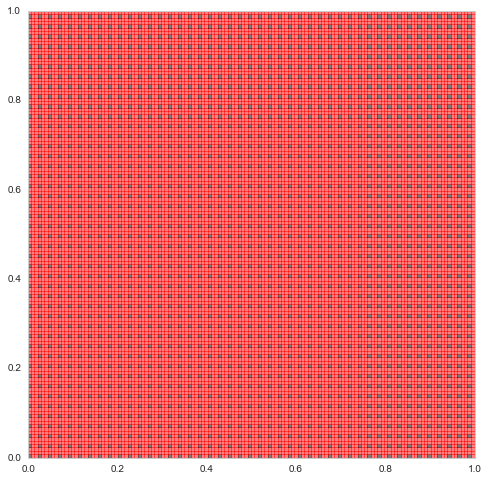

In [4]:
X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
Z = np.zeros(9).reshape(3,3)
Z[0, 0] = 1
F = Z.copy()
for i in range(44):
    F = np.c_[F, Z]

G = F.copy()
for i in range(44):
    G = np.r_[G, F]

print "num of gray cells: %d" % np.sum(G)

plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.pcolor(X, Y, G, alpha=0.5)
plt.flag()
plt.show()

### 一様乱数


num of gray cells: 2015


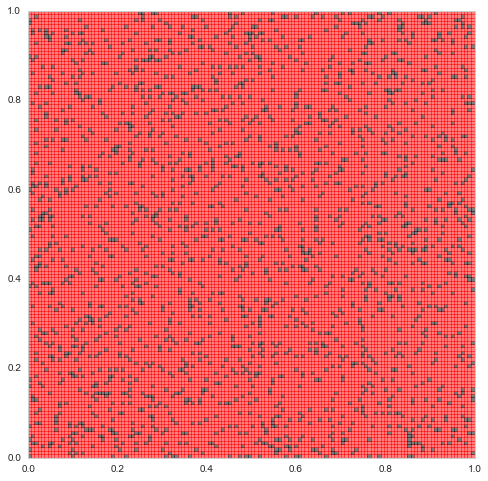

In [5]:
def lt(x, thresh):
    """閾値threshより小さいと1大きいと0を返す"""
    return 1 if x < thresh else 0

plt.figure(figsize=(8,8))
X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
Z = np.random.uniform(size=(n*n))
Z = np.vectorize(lt)(Z, ratio).reshape(n, n)

print "num of gray cells: %d" % np.sum(Z)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.pcolor(X, Y, Z, alpha=0.5)
plt.flag()
plt.show()

### 線形合同法 LCG (Linear congruential generator)
参考  
http://www.math.sci.hiroshima-u.ac.jp/~m-mat/TEACH/0407-2.pdf  

$x_{j+1} := ax_j+c\mod M$

1990 年代まで ANSI-C の標準擬似乱数 rand として用いられて
いたのは LCG で、パラメータは $a = 1103515245, c = 12345, M = 2^{31}$ で周
期は $M$。

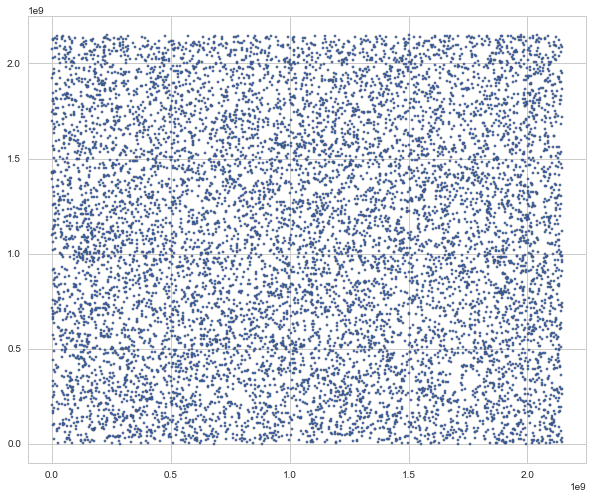

In [7]:
x=3  # initial seed (x_0)
def rand_lcg():
    global x
    x = x * 1103515245 + 12345
    x &= 0x7fffffff; # mod 2^31
    return x

rand_list =[]
for i in range(10000):
    rand_list.append([rand_lcg(), rand_lcg()])
rand_list = np.array(rand_list)

_max = np.max(rand_list)

plt.figure(figsize=(10,8))
plt.scatter(rand_list[:,0], rand_list[:,1], s=5)
plt.xlim(-10**8,_max+10**8)
plt.ylim(-10**8,_max+10**8)
plt.show()

### カテゴリカル分布

[]

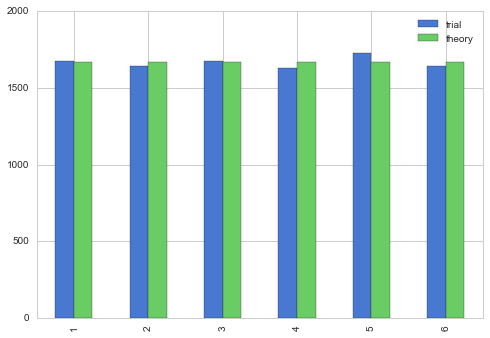

In [10]:
trial_num = 10000

x = rd.multinomial(1, [1/6]*6, trial_num)
result = np.sum(x, axis=0)
data = np.array([result, np.array([1/6]*6)*trial_num]).T

# Draw graph
df = pd.DataFrame(data, columns=["trial","theory"],index=range(1,7))
ax = df.plot.bar()
ax.set_ylim(0,2000)
ax.legend(loc='best')
plt.plot()

### 多項分布

In [11]:
trial_num = 10000
sample_size = 18

x = None
for _ in range(sample_size):
    if x is None:
        x = rd.multinomial(1, [1/6]*6, trial_num)
    else:
        x += rd.multinomial(1, [1/6]*6, trial_num)
        
x

array([[2, 2, 4, 1, 7, 2],
       [3, 1, 4, 1, 6, 3],
       [2, 5, 1, 3, 4, 3],
       ..., 
       [4, 5, 1, 4, 3, 1],
       [3, 2, 4, 5, 1, 3],
       [3, 4, 2, 4, 2, 3]])

### ベータ分布

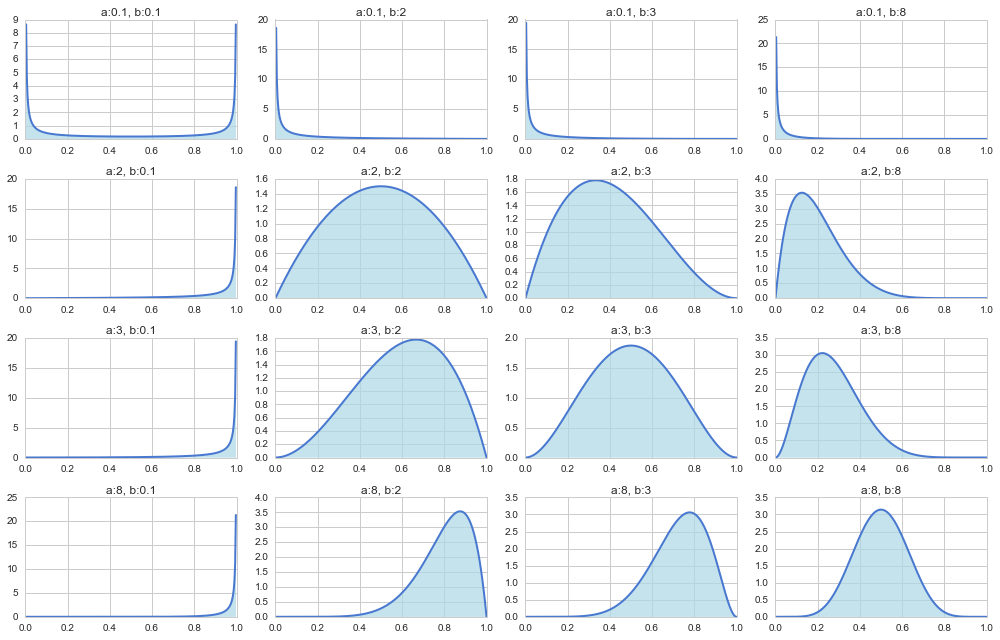

In [12]:
p = np.linspace(0, 1, 301)
i = 1

plt.figure(figsize=(14,9))
for a in [0.1,2,3,8]:
    for b in [0.1,2,3,8]:
        
        plt.subplot(4, 4, i)
        
        plt.title("a:{}, b:{}".format(a, b))
        plt.plot(p, st.beta.pdf(p, a, b), c="b", lw=2)  # ベータ分布の密度関数を表示
        plt.fill_between(p, st.beta.pdf(p, a, b), color="lightblue", alpha=.7) 
        
        i += 1
        
plt.tight_layout()
plt.show()

### ディリクレ分布

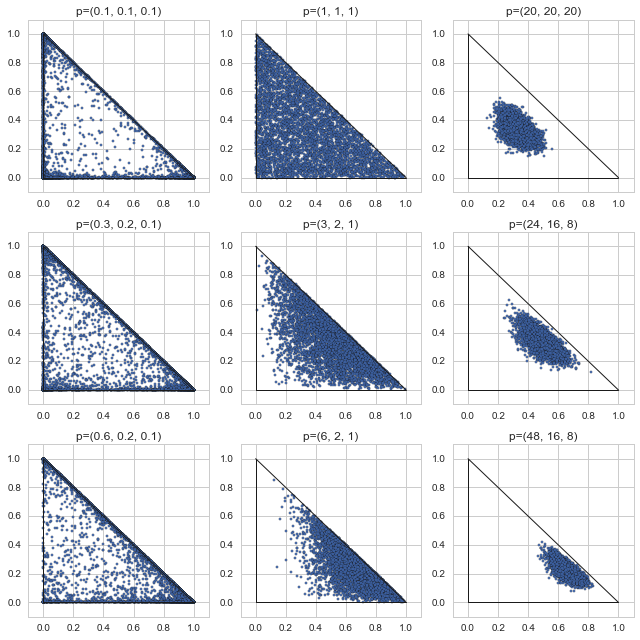

In [13]:
param = [
    [0.1, 0.1, 0.1],
    [  1,   1,   1],
    [ 20,  20,  20],
    [0.3, 0.2, 0.1],
    [  3,   2,   1],
    [ 24,  16,   8],
    [0.6, 0.2, 0.1],
    [  6,   2,   1],
    [ 48,  16,   8], 
]
n_row = 3
n_col = 3
plt.figure(figsize=(n_row*3, n_col*3))
for i, p in enumerate(param):
    plt.subplot(n_row, n_col, i+1)
    data = rd.dirichlet(p, 5000)
    plt.plot([0,0],[0,1], "k", lw=1)
    plt.plot([1,0],[0,1], "k", lw=1)
    plt.plot([1,0],[0,0], "k", lw=1)
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.scatter(data[:,0],data[:,1], s=5)
    plt.title("p=({}, {}, {})".format(p[0],p[1],p[2]))
plt.tight_layout()